# Convergence rates for Gaussian filters

In this notebook, we illustrate the usage of pn-diffeq through computing convergence rates of Gaussian ODE filters. See

https://arxiv.org/pdf/1807.09737.pdf

for analysis and many more experiments!

To illustrate, we use IVPs which allow a closed form solution. We start with the logistic ODE.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from probnum.diffeq import ode, odefiltsmooth
from probnum.prob import RandomVariable, Dirac


The logistic ODE as well as some others (Lotka-Volterra, FitzHugh-Nagumo, ...) are readily implemented in the `ode` module. To set them up, we need a random variable as initial values, e.g. a Dirac-distribution.

In [24]:
initdist = RandomVariable(distribution=Dirac(0.15 * np.ones(1)))
ivp1 = ode.logistic([0.0, 1.5], initdist, params=(2, 1))
arr = (np.array([ivp1.solution(0.) for i in range(2)]))


Solving IVPs is probably easiest with the function `filter_ivp_h()` where the ending `_h()` implies that we use constant step sizes. Adaptive steps are not ready for the public yet.

Note that the outputs contain estimates for the derivatives. To extract each coordinate, we slice accordingly.

665859.2645995152
683611.8197614842
688052.7804771283
681566.5042433435
667243.4026383942
648102.4685214226
626619.6239153178
604544.7401928935
582861.9182077085
561612.6587704946
538365.8530738874
495852.77953751216
721895.5771533153
744772.1541028615
752165.862227796
746635.9327354315
731742.0275746885
711057.6449175455
687547.7131111065
663315.5272552839
639541.1454501816
616258.4007581368
590476.2154791506
541510.9306659673
788230.2088760547
817951.4005816666
829454.8839840975
825441.1572542044
810044.4393808949
787559.3601589601
761600.3960968942
734743.5926812302
708431.0957424997
682684.7396023906
653757.139669854
596445.9861366829
867989.3527716072
907078.4425493582
924446.7050241743
922844.7326042152
907113.0167104526
882507.1108983847
853530.338580118
823411.3200547402
793954.0656041321
765161.42732115
732231.6381994358
663803.9759936894
965706.9812512959
1018003.9989154673
1044010.1136387906
1046311.4459169707
1030612.5662705022
1003487.0164474907
970699.9221052169
936416.64

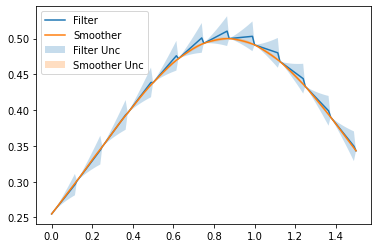

In [25]:
step = 0.125
nsteps_ = int(step / 0.01)
ms, cs, ts = odefiltsmooth.filter_ivp_h(ivp1, step, which_prior="ibm2", which_filt="kf", nsteps=nsteps_)
ms2, cs2, ts2 = odefiltsmooth.smoother_ivp_h(ivp1, step, which_prior="ibm2", which_filt="kf", nsteps=nsteps_)
means = ms[:, 1]
means2 = ms2[:, 1]
stdevs = np.sqrt(cs[:, 1, 1])
stdevs2 = np.sqrt(np.abs(cs2[:, 1, 1]))

sols = np.array([ivp1.solution(t) for t in ts])
plt.plot(ts, means, "-", label="Filter")
plt.plot(ts2, means2, "-", label="Smoother")

plt.fill_between(ts, means-3*stdevs, means+3*stdevs,  alpha=0.25, label="Filter Unc")

plt.fill_between(ts2, means2-3*stdevs2, means2+3*stdevs2,  alpha=0.25, label="Smoother Unc")
# plt.plot(ts, sols, alpha=0.25, linewidth=6, label="Truth")
plt.legend()
plt.show()


## Convergence rates of KF

We compare the convergence rates of the "classic" Kalman ODE filter on the IBM(1) prior. To this end, we comput the average error on each time step and the average standard deviation.

9.791284819713798
9.784152639715682
9.776985293439845
9.769782507577006
9.762544008541713
9.755269522489524
9.747958775334295
9.740611492765787
9.73322740026733
9.725806223134038
9.718347686490867
9.710851515311209
9.703317434435506
9.69574516859027
9.688134442407131
9.680484980442282
9.672796507196084
9.66506874713287
9.65730142470102
9.649494264353267
9.641646990567166
9.633759327865903
9.625831000839149
9.617861734164418
9.609851252628244
9.601799281148088
9.593705544793972
9.585569768810657
9.577391678639978
9.569170999943287
9.560907458624257
9.552600780851844
9.544250693083386
9.535856922088106
9.527419194970646
9.518937239194894
9.510410782608119
9.501839553465055
9.49322328045256
9.484561692714017
9.475854519874487
9.467101492065611
9.458302339950922
9.449456794751343
9.440564588270936
9.431625452922617
9.42263912175437
9.413605328475493
9.404523807482988
9.395394293888293
9.386216523544059
9.376990233071215
9.367715159886098
9.358391042227936
9.34901761918629
9.339594630728868

1.1934424354681696
1.1710567592583443
1.1491272876028855
1.1278863704364763
1.1077421349661483
1.089447221377519
1.0744139293708306
1.0650615136551127
1.0642321977890947
1.0727925854718767
1.0888356855122114
1.10998330277387
1.1347156432108096
1.162257454241813
1.1922555458932327
1.2245824019021692
1.2592381763746365
1.2963033262958945
1.3359159047749896
1.3782612918187513
1.423568695298847
1.4721117767337835
1.524212198137378
1.5802456263278388
1.6406501603686647
1.7059374479799494
1.7767070214701226
1.853664671579111
1.937646037761273
2.029647081250961
2.1308637983171783
2.242744539126624
2.367059802544571
2.505996673389175
2.66228865144547
2.8393973481774717
3.0417719265930105
3.275228051974674
3.547515904866797
3.869197266658194
4.255047436028869
4.7263889404500485
5.315169587553931
6.071522416222838
18.684516958106894
18.72452360010621
18.764803786014088
18.805359567212786
18.846193015119127
18.887306221419447
18.92870129830865
18.970380378731505
19.012345616628124
19.054599187182

7.310452412945367
7.301651805134766
7.292839378525678
7.284015065239936
7.275178797555192
7.266330507908944
7.257470128902413
7.248597593304556
7.239712834056011
7.230815784273162
7.221906377252068
7.212984546472594
7.204050225602438
7.195103348501192
7.186143849224488
7.177171662028049
7.168186721371901
7.159188961924426
7.1501783185666286
7.141154726396262
7.132118120732036
7.12306843711787
7.114005611327064
7.1049295793666065
7.095840277481418
7.0867376421586386
7.077621610131916
7.068492118385714
7.059349104159658
7.050192504952859
7.04102225852827
7.031838302917066
7.022640576423009
7.013429017626848
7.004203565390732
6.994964158862639
6.985710737480766
6.976443240978048
6.967161609386517
6.95786578304188
6.948555702587875
6.939231308980886
6.929892543494312
6.920539347723239
6.9111716635887515
6.901789433342645
6.892392599571867
6.882981105203082
6.8735548935072215
6.864113908104071
6.854658092966796
6.8451873924265305
6.835701751177005
6.826201114279051
6.816685427165288
6.80715

2.288454428021519
2.293965179267569
2.300268358670468
2.307401092157961
2.3154026350830144
2.3243145431654986
2.3341808626575964
2.3450483422648167
2.3569666697071017
2.369988736211929
2.384170932703754
2.3995734820042434
2.416260812000915
2.4343019754967203
2.453771123343004
2.4747480385113274
2.49731874001104
2.5215761670522765
2.547620955642086
2.575562321951483
2.605519069387161
2.6376207394485074
2.672008930281472
2.7088388115244344
2.7482808697928403
2.7905229262456674
2.8357724764747974
2.884259413922162
2.936239211766388
2.991996655530074
3.051850240601745
3.116157376860998
3.1853205785520244
3.259794864065896
3.3400966509244903
3.426814510934145
3.5206222560786826
3.622294966973629
3.7327287664997697
3.852965401665133
3.9842230562423824
4.127935319013551
4.285800943450598
4.45984805539504
4.6525179533281635
4.86677585158336
5.10625924678344
5.375479716701391
5.680102037492471
6.027337540765257
6.426510256652822
18.07896355354284
18.117151749801337
18.155600835180365
18.1943127

17.955305799376674
17.95015980656568
17.944607965370675
17.938646670790746
17.932272333642224
17.925481381533817
17.91827025985013
17.91063543274347
17.902573384133802
17.894080618716323
17.88515366297639
17.875789066211038
17.865983401557592
17.855733267028153
17.84503528654968
17.83388611100983
17.82228241930709
17.81022091940632
17.79769834939722
17.78471147855726
17.77125710841704
17.75733207382884
17.742933244036873
17.728057523749055
17.712701854210565
17.696863214276938
17.680538621488292
17.663725133142016
17.646419847365294
17.6286199041854
17.61032248659804
17.59152482163299
17.572224181416345
17.55241788422849
17.532103295558347
17.511277829151464
17.48993894805318
17.468084165644797
17.44571104667343
17.42281720827327
17.399400320979645
17.37545810973347
17.35098835487627
17.32598889313528
17.30045761859739
17.27439248367196
17.247791500041167
17.220652739597636
17.192974335368966
17.164754482427742
17.13599143878703
17.10668352628062
17.076829131426866
17.0464267062763
17.

768.8878286731675
796.9604996639257
826.6686238921463
858.1440828587706
891.5324280371077
926.9946210928065
964.7090380459318
1004.8737840557076
1047.7093749835246
1093.4618535441766
1142.406422253067
1194.851693242887
1251.1446772950733
1311.6766623338424
1376.8901667587177
1447.287197459094
1523.4390989483445
1605.9983525085179
1695.7127775540116
1793.4427083847058
1900.1818773468735
2017.0829428612851
2145.488875425546
2286.9717811873975
2443.381235791317
2616.904870510834
2810.1448696256693
3026.2153066528876
3268.8670207956866
3542.6492427980597
3853.1207676243557
4207.128671466117
4613.180210466496
5081.944929533188
5626.941265307322
6265.488520160017
7020.04683714373
7920.134705130218
9005.123115395043
10328.38943754869
11963.63120871297
14014.703198035782
16631.374710355478
20035.372278816718
24564.979199429483
30754.58801914516
39483.42461129443
52269.20908826705
71886.33544376794
103768.79662698561
159484.7224261664
266209.2975995878
494704.75997016823
1035682.0365797782
2191

185.85553987813094
188.85022780912834
191.92195012158257
195.07341976121714
198.30747174637284
201.62706987700273
205.03531388028878
208.5354470257226
212.13086424538815
215.82512079825653
219.62194152066277
223.52523070890228
227.5390826839736
231.66779309296615
235.9158710065712
240.28805187770573
244.7893114322099
249.42488056922028
254.20026135633455
259.12124421262865
264.19392638176606
269.4247318074244
274.8204325343058
280.3881717704478
286.13548876023714
292.07034563284606
298.20115640794296
304.5368183594235
311.0867459595006
317.8609076490488
324.86986570702385
332.12481952172124
339.6376526003681
347.42098369142315
355.4882224368068
363.8536300194663
372.5323853261688
381.54065720727175
390.8956834849873
400.61585744123676
410.72082260644567
421.23157677358563
432.17058627908995
443.5619117266221
455.43134648332307
467.80656945432554
480.71731384441244
494.19555384866777
508.27571148358123
522.9948860816896
538.3931093332883
554.5136291786796
571.4032263415505
589.112567863

57.23451587932103
56.58386488984061
55.926221654412906
55.261843740154134
54.59099035681481
53.91392201755761
53.23090020422787
52.54218703801109
51.84804495634818
51.14873639695504
50.44452348976792
49.73566775761257
49.02242982636969
48.305069145389254
47.58384371888417
46.85900984901789
46.13082189138735
45.39953202359463
44.66539002759789
43.928643086539445
43.18953559676204
42.44830899575064
41.70520160677602
40.960448501069976
40.214281378436176
39.46692846729508
38.71861444528475
37.9695603816937
37.219983703196306
36.47009818460362
95.64915926831577
96.36319605544496
97.07991540017183
97.79912977520493
98.52064168522946
99.24424337279369
99.96971652422567
100.69683197635321
101.42534942486428
102.15501713521968
102.88557165708649
103.61673754333549
104.34822707473293
105.07973999150903
105.81096323308469
106.541570687295
107.27122295054815
107.99956710042262
108.72623648228709
109.45085051161621
110.1730144937321
110.89231946281839
111.60834204206407
112.32064432693821
113.0287

39.611229253399465
39.37411027256065
39.13282630280934
38.887413398668976
38.63790925165687
38.384353164885034
38.126786026279156
37.86525028049002
37.5997898995727
37.33045035251776
37.057278573721575
36.78032293049111
36.499633189682065
36.21526048357761
35.92725727511941
35.63567732261057
35.340575644016575
35.04200848099739
34.74003326281244
34.43470857024771
34.12609409972429
33.81425062775607
33.499239975936376
33.1811249766442
32.85996943967386
32.53583812000641
32.20879668695688
31.878911694949675
31.54625055619467
31.210881515558853
30.872873627955354
30.53229673859982
30.189221466519168
29.843719191734856
29.495862046588343
29.145722911726214
28.793375417321798
28.43889395017781
28.08235366743308
27.72383051768807
27.363401270470582
27.001143555086816
26.637135910049288
26.271457844443947
25.904189912799364
25.535413805258965
25.165212455137862
24.793670166279394
24.42087276302294
24.04690776606944
23.67186459809886
23.295834823676753
22.918912428813194
73.65457979291911
74.0

339.1748804826555
340.27874316537526
341.2403761419426
342.0568500667035
342.7256132794335
343.24451246142416
343.61181100231664
343.82620484352867
343.886835592061
343.7933007308208
343.54566078771614
343.144443365076
342.59064397259954
341.88572365021565
341.031603411025
340.03065557801614
338.88569213054916
337.5999502168155
336.1770750258527
334.6211002463919
332.9364263693527
331.1277971155875
329.20027429023855
327.1592113795688
325.01022621531007
322.7591730355647
320.4121142702721
317.97529237361516
315.4551020159044
312.8580629340354
310.190793723141
307.459986833276
304.67238501455637
301.83475943286385
298.95388965675386
296.0365456952844
293.08947224683465
290.1193753012556
287.13291122260097
284.136678427817
330.88137155948107
335.56896420084826
340.2626464744615
344.9566771909181
349.64495839776885
354.3210350749305
358.9780972740195
363.6089849520504
368.20619574612704
372.76189592701826
377.2679347557008
381.71586244694055
386.0969519179873
390.40222446759986
394.622479

186.70643237677947
187.6165444785624
188.491641668326
189.33038727939427
190.13146849927924
190.8936007325495
191.61553202985027
192.29604756188954
192.93397411584886
193.52818459046063
194.0776024649374
194.58120621608836
195.0380336573191
195.44718617278994
195.80783281985765
196.1192142730391
196.38064658310282
196.59152472557767
196.75132591392978
196.85961265389025
196.91603551696875
196.92033561298314
196.87234674351365
196.77199722050275
196.61931133676833
196.41441047792284
196.1575138681193
195.8489389450631
195.48910136290505
195.07851462482537
194.61778935038026
194.1076321859176
193.54884436957389
192.94231996548385
192.28904378485106
191.59008901440146
190.84661457544084
190.05986223926362
189.23115352695498
188.361886423722
187.45353193973378
186.50763055107987
185.52578855583974
184.50967438143226
183.4610148803804
182.38159165241004
181.27323743144004
180.13783257652543
178.97730170626414
177.7936105165735
176.58876282218364
175.36479786270903
174.12378791483823
172.867

1853.2115876243565
1846.0031162350624
1838.067944298675
1829.537095978035
1820.542802924135
1811.2177754233942
1801.6946456919177
1692.634026082471
1727.1658218089744
1760.7801823115353
1793.3267654153258
1824.6570558993985
1854.6265109635456
1883.0967802061257
1909.9379440322252
1935.030709235903
1958.2684978773368
1979.559365896344
1998.8276913733162
2016.0155789539972
2031.0839364486335
2044.0131915249412
2054.8036300722024
2063.4753524168154
2070.0678582432283
2074.6392849548415
2077.2653365141937
2078.0379498972848
2077.0637537420757
2074.462378344573
2070.364677855192
2064.9109245515106
2058.2490317732536
2050.5328569821086
2041.920629999932
2032.5735443513186
2022.6545423351608
2012.327317465997
2001.755551679111
1840.9891921393425
1882.6881495311936
1923.515614301743
1963.2815076089055
2001.794874797546
2038.866629524703
2074.3124862487243
2107.956009798269
2139.6316991946846
2169.1880145589753
2196.4902516902625
2221.4231694236228
2243.893280503735
2263.8307274042454
2281.1906

1148.464687898539
1152.4509060968703
1155.7428509597314
1158.3571234368565
1160.3143482943935
1161.638979885245
1162.3590766990337
1162.5060509322893
1162.1143997055567
1161.221424752411
1159.8669474270544
1158.0930257406192
1155.9436798664567
1153.4646321806874
1150.7030674584605
1147.7074183623479
1144.527180870998
1141.2127638367149
1137.8153764617437
1156.7092173057026
1173.2352396650112
1189.1775723230785
1204.4877972735574
1219.1200657992247
1233.031648782754
1246.1834684172443
1258.5406004678612
1270.072736557406
1280.7545966455502
1290.5662829317841
1299.4935678072923
1307.5281101618398
1314.6675962557863
1320.9158034180734
1326.2825869454869
1330.7837926710702
1334.4410996568108
1337.2817992732014
1339.3385184924207
1340.6488964956561
1341.2552246484272
1341.2040605193054
1340.5458269139563
1339.3344068909482
1337.6267454556546
1335.482468142377
1332.9635260487776
1330.1338761424538
1327.0592048800067
1323.8067024276074
1320.4448941102203
1317.6806953881282
1339.960530325401
1

14411.279775091683
14406.506299489209
14387.226103453739
14357.526863242143
14321.563791510207
13230.171260379266
13576.912760633766
13891.994667608189
14172.84018371833
14417.695389579874
14625.701731842466
14796.923325387459
14932.328919710642
15033.732748712744
15103.702094814824
15145.441806687384
15162.667028638496
15159.47510515486
15140.226298056554
15109.440992625381
15071.718889822492
13842.121687131234
14223.881718567669
14571.92570241236
14883.165690816824
15155.419170942328
15387.50455436642
15579.28434277174
15731.654602435021
15846.48480170463
15926.516690195827
15975.234109577495
15996.717129493903
15995.49374646161
15976.400894630446
15944.464184291428
15904.803134890915
14513.428076960374
14935.594783523642
15321.83917524936
15668.449307643708
15972.70983932902
16233.027482516514
16448.995753011633
16621.39582338162
16752.137044056555
16844.146661513372
16901.22257399821
16927.865167204774
16929.104358040906
16910.336317387504
16877.181550309717
16835.37276065607
15253

7966.127726508037
7982.205103364074
7991.526190305822
7995.230726848379
7994.512521617886
7990.605018258489
7984.7700242285655
7770.465198755005
7894.688716527112
8006.310681049877
8105.11858185728
8191.115628774504
8264.519052344986
8325.752062820678
8375.430294596628
8414.343858910514
8443.436318691392
8463.781980346408
8476.562876054202
8483.046705303039
8484.566841137326
8482.50531262177
8478.279477304053
8220.854771197748
8361.92210052055
8489.216802221164
8602.413178871198
8701.433626273425
8786.449331807189
8857.873133302088
8916.345417596662
8962.714343844484
8998.011954163345
9023.427871391217
9040.282286808344
9049.999831022053
9054.085730177776
9054.105413210335
9051.668489578227
8739.557888474365
8901.042046180144
9047.373584688672
9178.074693374248
9292.955577470124
9392.118826651697
9475.953964670018
9545.123085307809
9600.539044554438
9643.338085468864
9674.848997288582
9696.560956061654
9710.092084562217
9717.160544114806
9719.559677683414
9719.138410428795
9337.2914506

103479.37144795075
99371.97125645947
101721.36894552197
103491.03732226074
104720.26218850512
105476.54906689895
105848.75663188875
105939.80534556891
105860.25438089635
101544.83337740572
104002.45252236606
105856.3068924433
107146.0028368409
107941.21551922389
108334.43686149248
108433.2128335528
108353.27753717978
103814.8430923708
106388.18870082627
108332.22086641277
109686.78811522627
110523.82138917664
110939.66860636653
111046.81940105118
110966.55475046816
106188.66450734524
108885.94851709336
110926.72889546528
112351.00107688042
113233.03965656483
113673.28933207686
113789.53133061482
113709.00196134244
108673.58551529443
111503.81187257222
113648.56087984276
115147.85952375992
116078.41505680888
116545.02955146294
116671.15708170642
116590.43884606761
111277.5925313035
114250.654846686
116507.3251022916
118087.52255994354
119070.47643366783
119565.62855400878
119702.524493251
119621.70629894205
114009.45623598824
117136.25024099665
119513.62155470128
121181.21389417251
1222

55344.782937724645
54428.5172216813
55164.8226950868
55721.04518857
56116.02455508737
56373.57494358989
56521.198352162995
56588.88018824585
56608.092130912126
55644.34321491024
56420.32263102381
57008.60809852415
57428.55168590903
57704.829067839215
57866.0776758826
57943.61500192577
57970.37398920312
56953.54247490843
57772.84628246645
58396.08921180892
58843.172293370626
59139.71179672351
59315.593133517075
59403.60231502066
59438.28525472708
58362.12832395173
59228.795995944376
59890.20437623082
60366.840581110395
60685.34676555183
60876.97984435278
60976.14520605271
61019.170074570255
59876.70786227311
60795.2198839663
61498.357410498575
62007.23075049112
62349.600034031835
62558.229568354065
62669.31138328379
62721.14134748295
61504.54819251607
62479.88605154292
63228.72093800321
63772.822895675046
64141.169528246384
64368.18237026332
64492.026053109395
64553.1741600101
63253.65190105992
64291.36752111584
65090.329132103056
65673.00174965797
66069.68799361476
66316.63220427171
66

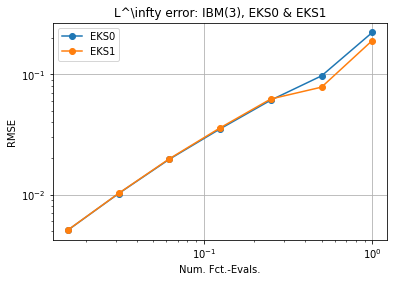

In [42]:
avgerr, avgstd = [], []
stps = np.array([0.5**i for i in range(7)])
for step in stps:
    nsteps_ = int(step / 0.5**9)
    ms, cs, ts = odefiltsmooth.smoother_ivp_h(ivp1, step, which_filt="kf", which_prior="ibm1", nsteps=nsteps_)
    ms2, cs2, ts2 = odefiltsmooth.smoother_ivp_h(ivp1, step, which_filt="ekf", which_prior="ibm1", nsteps=nsteps_)
    means = ms[:, 0]
    sols = np.array([ivp1.solution(t) for t in ts])
    solsder = np.array([ivp1.rhs(t, ivp1.solution(t)) for t in ts])
    # avgerr.append(np.linalg.norm(np.abs(sols[:, 0] - means))/np.sqrt(len(means)))
    err = np.linalg.norm(sols[:, 0] - ms[:, 0], ord=np.inf)
    errder = np.linalg.norm(solsder[:, 0] - ms[:, 1], ord=np.inf)
    avgerr.append(np.maximum(err, errder))

    sols = np.array([ivp1.solution(t) for t in ts2])
    solsder = np.array([ivp1.rhs(t, ivp1.solution(t)) for t in ts2])
    err2 = np.linalg.norm(sols[:, 0] - ms2[:, 0], ord=np.inf)
    errder2 = np.linalg.norm(solsder[:, 0] - ms2[:, 1], ord=np.inf)
    avgstd.append(np.maximum(err2, errder2))
    print(sols.shape)

plt.loglog(stps, avgerr, "o-", label="EKS0")
plt.loglog(stps, avgstd, "o-", label="EKS1")
# plt.loglog(stps, stps**4, "--", color="gray", label="O(h^3)")
plt.ylabel("RMSE")
plt.xlabel("Num. Fct.-Evals.")
plt.title("L^\infty error: IBM(3), EKS0 & EKS1")
plt.legend()
plt.grid()
plt.show()

## Higher order IBM(q) priors

Seems like IBM(1) does as expected. How do higher order IBM(q) priors fare? Note that only $q \in \{1, 2, 3\}$ is supported, since higher orders would require analytic knowledge of higher order derivatives of the ODE right-hand side function. 

In [ ]:
def error(ms, sols):
    return np.linalg.norm((sols[:, 0] - ms[:, 0]))/np.sqrt(sols[:, 0].size)

DCNST = 50
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
stps = np.array([0.5**i for i in range(4, 8)])

err_ibm1, err_ibm2, err_ibm3, err_ibm4 = [], [], [], []
for step in stps:
    ms1, __, ts1 = odefiltsmooth.smoother_ivp_h(ivp1, step, diffconst=DCNST, which_prior="ibm1", which_filt="kf")
    sols1 = np.array([ivp1.solution(t) for t in ts1])
    err_ibm1.append(error(ms1, sols1))
    
    ms2, __, ts2 = odefiltsmooth.smoother_ivp_h(ivp1, step, diffconst=DCNST, which_prior="ibm2", which_filt="kf")
    sols2 = np.array([ivp1.solution(t) for t in ts2])
    err_ibm2.append(error(ms2, sols2))
    
    ms3, __, ts3 = odefiltsmooth.smoother_ivp_h(ivp1, step, diffconst=DCNST, which_prior="ibm3", which_filt="kf")
    sols3 = np.array([ivp1.solution(t) for t in ts3])
    err_ibm3.append(error(ms3, sols3))

    
    # ms4, __, ts4 = odefiltsmooth.smoother_ivp_h(ivp1, step, diffconst=DCNST, which_prior="ibm4", which_filt="kf")
    # sols4 = np.array([ivp1.solution(t) for t in ts3])
    err_ibm4.append(0)
    # err_ibm4.append(error(ms4, sols4))

ax1.loglog(stps, np.array(err_ibm1), "o-", label="IBM(1)", alpha=0.75)
ax1.loglog(stps, np.array(err_ibm2), "o-", label="IBM(2)", alpha=0.75)
ax1.loglog(stps, np.array(err_ibm3), "o-", label="IBM(3)", alpha=0.75)
ax1.loglog(stps, np.array(err_ibm4), "o-", label="IBM(4)", alpha=0.75)

ax1.loglog(stps, stps**1, alpha=0.75, linestyle="--", color="black", label="O(h^2)")
ax1.loglog(stps, 0.1*stps**2, alpha=0.75, linestyle=":", color="black", label="O(h^3)")
ax1.loglog(stps, 10*stps**3, alpha=0.75, linestyle="-.", color="black", label="O(h^4)")
ax1.set_title("||m - x||")
ax1.set_xlabel("Fct.-Evals")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid()

plt.show()

## A Different ODE

The same results hold for a different ODE, e.g. for the linear system Eq. 8.3 in Kersting et al., 2019.

In [ ]:
def fct(t, x):
    x1, x2 = x
    return np.array([-np.pi*x2, np.pi*x1])

def jac(t, x):
    return np.array([[0, -np.pi],[np.pi, 0]])

def sol(t):
    return np.array([-np.sin(t*np.pi), np.cos(t*np.pi)])

initdist = gaussian.MultivariateGaussian(np.array([0., 1.]), 0*np.eye(2))
ivp_lin = ode.ivp.IVP([0., 5.], initdist, fct, jac=jac, sol=sol)


In [ ]:
def error(ms, sols):
    return np.linalg.norm((sols - ms))/np.sqrt(sols.size)

DCNST = 25
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
stps = np.array([0.5**i for i in range(4, 9)])

err_ibm1, err_ibm2, err_ibm3, err_ibm4 = [], [], [], []
for step in stps:
    ms1, __, ts1 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm1", which_filt="kf")
    sols1 = np.array([ivp_lin.solution(t) for t in ts1])
    err_ibm1.append(error(ms1[:, [0, 2]], sols1))
    
    ms2, __, ts2 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm2", which_filt="kf")
    sols2 = np.array([ivp_lin.solution(t) for t in ts2])
    err_ibm2.append(error(ms2[:, [0, 3]], sols2))
    
    ms3, __, ts3 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm3", which_filt="kf")
    sols3 = np.array([ivp_lin.solution(t) for t in ts3])
    err_ibm3.append(error(ms3[:,  [0, 4]], sols3))

    # ms4, __, ts4 = odefilter.solve_filter_h(ivp, step, diffconst=DCNST, which_prior="ibm4", which_filt="kf")
    # sols4 = np.array([ivp.solution(t) for t in ts4])
    # err_ibm4.append(error(ms4, sols4))

ax1.loglog(1/stps, np.array(err_ibm1), "o-", label="IBM(1)", alpha=0.75)
ax1.loglog(1/stps, np.array(err_ibm2), "o-", label="IBM(2)", alpha=0.75)
ax1.loglog(1/stps, np.array(err_ibm3), "o-", label="IBM(3)", alpha=0.75)

ax1.loglog(1/stps, 20*stps**2, "--", alpha=0.75, color="gray", label="O(h^2)")
ax1.loglog(1/stps, 100*stps**3, "-.", alpha=0.75, color="gray", label="O(h^3)")
ax1.loglog(1/stps, 100*stps**4, ":", alpha=0.75, color="gray", label="O(h^4)")
ax1.set_title("||m - x||")
ax1.set_xlabel("Fct.-Evals")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid()

plt.show()

## Other Filters

We can do the same experiments for the UKF. Interestingly, it seems that the convergence rates somewhat hold in the same way, in fact they kick in much quicker, but numerical instability becomes a concern pretty quickly.

In [ ]:
def error(ms, sols):
    return np.linalg.norm((sols - ms))/np.sqrt(sols.size)

DCNST = 1
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
stps = np.array([0.5**i for i in range(1, 8)])

err_ibm1, err_ibm2, err_ibm3, err_ibm4 = [], [], [], []
for step in stps:
    ms1, __, ts1 = odefilter.solve_filter_h(ivp_lin, step, which_prior="ibm1", which_filt="ukf")
    sols1 = np.array([ivp_lin.solution(t) for t in ts1])
    err_ibm1.append(error(ms1[:, [0, 2]], sols1))
    
    ms2, __, ts2 = odefilter.solve_filter_h(ivp_lin, step, which_prior="ibm2", which_filt="ukf")
    sols2 = np.array([ivp_lin.solution(t) for t in ts2])
    err_ibm2.append(error(ms2[:, [0, 3]], sols2))
    
    ms3, __, ts3 = odefilter.solve_filter_h(ivp_lin, step, which_prior="ibm3", which_filt="ukf")
    sols3 = np.array([ivp_lin.solution(t) for t in ts3])
    err_ibm3.append(error(ms3[:,  [0, 4]], sols3))

    # ms4, __, ts4 = odefilter.solve_filter_h(ivp, step, diffconst=DCNST, which_prior="ibm4", which_filt="kf")
    # sols4 = np.array([ivp.solution(t) for t in ts4])
    # err_ibm4.append(error(ms4, sols4))

ax1.loglog(1/stps, np.array(err_ibm1), "o-", label="IBM(1)", alpha=0.75)
ax1.loglog(1/stps, np.array(err_ibm2), "o-", label="IBM(2)", alpha=0.75)
ax1.loglog(1/stps, np.array(err_ibm3), "o-", label="IBM(3)", alpha=0.75)

ax1.loglog(1/stps, 20*stps**2, "--", alpha=0.75, color="gray", label="O(h^2)")
ax1.loglog(1/stps, 1*stps**3, "-.", alpha=0.75, color="gray", label="O(h^3)")
ax1.loglog(1/stps, 10*stps**4, ":", alpha=0.75, color="gray", label="O(h^4)")
ax1.set_title("||m - x||")
ax1.set_xlabel("Fct.-Evals")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid()

plt.show()

In [ ]:
# This is for the IMPRS presentation, hence simplified labelling.

plt.rcParams.update({'font.size': 22})
def error(ms, sols):
    return np.linalg.norm((sols - ms))/np.sqrt(sols.size)

DCNST = 25
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
stps = np.array([0.5**i for i in range(3, 11)])

err_ibm1, err_ibm2, err_ibm3, err_ibm4 = [], [], [], []
for step in stps:
    ms1, __, ts1 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm1", which_filt="kf")
    sols1 = np.array([ivp_lin.solution(t) for t in ts1])
    err_ibm1.append(error(ms1[:, [0, 2]], sols1))
    
    ms2, __, ts2 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm2", which_filt="kf")
    sols2 = np.array([ivp_lin.solution(t) for t in ts2])
    err_ibm2.append(error(ms2[:, [0, 3]], sols2))
    
    ms3, __, ts3 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm3", which_filt="kf")
    sols3 = np.array([ivp_lin.solution(t) for t in ts3])
    err_ibm3.append(error(ms3[:,  [0, 4]], sols3))

    # ms4, __, ts4 = odefilter.solve_filter_h(ivp, step, diffconst=DCNST, which_prior="ibm4", which_filt="kf")
    # sols4 = np.array([ivp.solution(t) for t in ts4])
    # err_ibm4.append(error(ms4, sols4))

ax1.loglog(1/stps, np.array(err_ibm1), "o-", label="Order 1", alpha=0.75, linewidth=3)
ax1.loglog(1/stps, np.array(err_ibm2), "o-", label="Order 2", alpha=0.75, linewidth=3)
ax1.loglog(1/stps, np.array(err_ibm3), "o-", label="Order 3", alpha=0.75, linewidth=3)

ax1.loglog(1/stps, 20*stps**2, "--", alpha=0.75, color="gray", label="O(h^2)", linewidth=2)
ax1.loglog(1/stps, 100*stps**3, "-.", alpha=0.75, color="gray", label="O(h^3)", linewidth=2)
ax1.loglog(1/stps, 100*stps**4, ":", alpha=0.75, color="gray", label="O(h^4)", linewidth=2)
ax1.set_xlabel("Fct.-Evals")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid()

plt.savefig("convrates_lin", dpi=300)
plt.show()

In [ ]:
initdist = RandomVariable(distribution=Dirac(0.15 * np.ones(1)))
ivp1 = ode.logistic([0.0, 1.5], initdist, params=(10, 1))

ms1, cs1, ts1 = odefiltsmooth.smoother_ivp_h(ivp1, step=0.05, which_prior="ibm2",
                                             which_filt="kf", nsteps=25)
ms2, cs2, ts2 = odefiltsmooth.smoother_ivp_h(ivp1, step=0.05, which_prior="ibm2",
                                             which_filt="ekf", nsteps=25)


plt.plot(ts1, ms1[:, 1], label="EKS0")
plt.fill_between(ts1, ms1[:, 1] - 3*np.sqrt(np.abs(cs1[:, 1, 1])), ms1[:, 1] + 3*np.sqrt(np.abs(cs1[:, 1, 1])), alpha=0.25)
plt.plot(ts2, ms2[:, 1], label="EKS1")
plt.fill_between(ts2, ms2[:, 1] - 3*np.sqrt(np.abs(cs2[:, 1, 1])), ms2[:, 1] + 3*np.sqrt(np.abs(cs2[:, 1, 1])), alpha=0.25)
plt.legend()
plt.show()